# Task 01:
What I did was to see if the starting point was accurate. Your task is to check the Half-life of an cyclone and also the landfall.

In [1]:
import xarray as xr
import dask
import math

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point
from matplotlib import animation
from tqdm.auto import tqdm
from datetime import datetime,timedelta

This report is made based on dataset: [ML_TCBOB > People > Sanjid > data > filtered_all_cyclone[4th august 2023].csv](https://drive.google.com/drive/u/1/folders/1G3bFHJ5DDYsiIOVouXnMyQ4GR4tbf9B7)

In [2]:
file_path='/mnt/1A42C1DD42C1BE2F/MyProjects/ML_TCBOB/Data/Preprocessed data/filtered_all_cyclone[4th august 2023].csv'
pre_data=pd.read_csv(file_path)

In [3]:
pre_data

cyclone_no                 Date    lat    lon         eye      eye.1  \
0              1  1979-05-07 22:00:00   6.75  86.50   95.660950  97.736984   
1              1  1979-05-07 23:00:00   6.75  86.25   93.597015  97.013519   
2              1  1979-05-08 00:00:00   6.75  86.25   96.556213  92.251709   
3              1  1979-05-08 01:00:00   6.75  86.00   98.818558  98.317696   
4              1  1979-05-08 02:00:00   6.75  86.00  100.057404  97.221611   
...          ...                  ...    ...    ...         ...        ...   
3781          49  2020-05-20 10:00:00  21.50  88.00  101.143356  97.755447   
3782          49  2020-05-20 11:00:00  21.75  88.25  100.676369  95.485931   
3783          49  2020-05-20 12:00:00  22.00  88.25  100.126091  91.098595   
3784          49  2020-05-20 13:00:00  22.25  88.25  101.419983  89.391251   
3785          49  2020-05-20 14:00:00  22.50  88.25  104.923904  89.879066   

          eye.2     eye.3     eye.4     eye.5  ...  rquv grid.2800  \
0     95.491577  0.000016  0.005992  0.014564  ...      302.293976   
1     92.399307  0.000016  0.005942  0.014518  ...      302.293976   
2     94.831024  0.000015  0.005842  0.014695  ...      302.293976   
3     94.402756  0.000016  0.005979  0.014798  ...      302.293976   
4     92.912262  0.000016  0.006008  0.014700  ...      302.293976   
...         ...       ...       ...       ...  ...             ...   
3781  90.524521  0.000051  0.008797  0.017035  ...      302.579834   
3782  90.572113  0.000050  0.008171  0.016890  ...      302.579834   
3783  93.382980  0.000049  0.007944  0.017346  ...      302.579834   
3784  94.638206  0.000048  0.007829  0.016972  ...      302.579834   
3785  95.363976  0.000048  0.007713  0.016826  ...      302.579834   

      rquv grid.2801  rquv grid.2802  rquv grid.2803  rquv grid.2804  \
0         302.067444      302.128967      302.358368      302.762665   
1         302.067444      302.128967      302.358368      302.762665   
2         302.067444      302.128967      302.358368      302.762665   
3         302.067444      302.128967      302.358368      302.762665   
4         302.067444      302.128967      302.358368      302.762665   
...              ...             ...             ...             ...   
3781      302.588623      302.683289      302.565247      302.612030   
3782      302.588623      302.683289      302.565247      302.612030   
3783      302.588623      302.683289      302.565247      302.612030   
3784      302.588623      302.683289      302.565247      302.612030   
3785      302.588623      302.683289      302.565247      302.612030   

      rquv grid.2805  rquv grid.2806  rquv grid.2807  lat+6  lon+6  
0         302.859283      302.898346             NaN   6.75  86.00  
1         302.859283      302.898346             NaN   6.75  86.00  
2         302.859283      302.898346             NaN   6.75  86.00  
3         302.859283      302.898346             NaN   6.75  86.00  
4         302.859283      302.898346             NaN   6.75  86.00  
...              ...             ...             ...    ...    ...  
3781      302.591644      302.658813             NaN  22.75  88.25  
3782      302.591644      302.658813             NaN  23.00  88.50  
3783      302.591644      302.658813             NaN  23.25  88.50  
3784      302.591644      302.658813             NaN  23.25  88.50  
3785      302.591644      302.658813             NaN  23.50  88.50  

[3786 rows x 2826 columns]

In [4]:
column_name_mapping = {
    'cyclone_no': 'NUMBER',
    'Date': 'ISO_TIME'
}

# Use the rename method to rename the columns
pre_data.rename(columns=column_name_mapping, inplace=True)
pre_data

NUMBER             ISO_TIME    lat    lon         eye      eye.1  \
0          1  1979-05-07 22:00:00   6.75  86.50   95.660950  97.736984   
1          1  1979-05-07 23:00:00   6.75  86.25   93.597015  97.013519   
2          1  1979-05-08 00:00:00   6.75  86.25   96.556213  92.251709   
3          1  1979-05-08 01:00:00   6.75  86.00   98.818558  98.317696   
4          1  1979-05-08 02:00:00   6.75  86.00  100.057404  97.221611   
...      ...                  ...    ...    ...         ...        ...   
3781      49  2020-05-20 10:00:00  21.50  88.00  101.143356  97.755447   
3782      49  2020-05-20 11:00:00  21.75  88.25  100.676369  95.485931   
3783      49  2020-05-20 12:00:00  22.00  88.25  100.126091  91.098595   
3784      49  2020-05-20 13:00:00  22.25  88.25  101.419983  89.391251   
3785      49  2020-05-20 14:00:00  22.50  88.25  104.923904  89.879066   

          eye.2     eye.3     eye.4     eye.5  ...  rquv grid.2800  \
0     95.491577  0.000016  0.005992  0.014564  ...      302.293976   
1     92.399307  0.000016  0.005942  0.014518  ...      302.293976   
2     94.831024  0.000015  0.005842  0.014695  ...      302.293976   
3     94.402756  0.000016  0.005979  0.014798  ...      302.293976   
4     92.912262  0.000016  0.006008  0.014700  ...      302.293976   
...         ...       ...       ...       ...  ...             ...   
3781  90.524521  0.000051  0.008797  0.017035  ...      302.579834   
3782  90.572113  0.000050  0.008171  0.016890  ...      302.579834   
3783  93.382980  0.000049  0.007944  0.017346  ...      302.579834   
3784  94.638206  0.000048  0.007829  0.016972  ...      302.579834   
3785  95.363976  0.000048  0.007713  0.016826  ...      302.579834   

      rquv grid.2801  rquv grid.2802  rquv grid.2803  rquv grid.2804  \
0         302.067444      302.128967      302.358368      302.762665   
1         302.067444      302.128967      302.358368      302.762665   
2         302.067444      302.128967      302.358368      302.762665   
3         302.067444      302.128967      302.358368      302.762665   
4         302.067444      302.128967      302.358368      302.762665   
...              ...             ...             ...             ...   
3781      302.588623      302.683289      302.565247      302.612030   
3782      302.588623      302.683289      302.565247      302.612030   
3783      302.588623      302.683289      302.565247      302.612030   
3784      302.588623      302.683289      302.565247      302.612030   
3785      302.588623      302.683289      302.565247      302.612030   

      rquv grid.2805  rquv grid.2806  rquv grid.2807  lat+6  lon+6  
0         302.859283      302.898346             NaN   6.75  86.00  
1         302.859283      302.898346             NaN   6.75  86.00  
2         302.859283      302.898346             NaN   6.75  86.00  
3         302.859283      302.898346             NaN   6.75  86.00  
4         302.859283      302.898346             NaN   6.75  86.00  
...              ...             ...             ...    ...    ...  
3781      302.591644      302.658813             NaN  22.75  88.25  
3782      302.591644      302.658813             NaN  23.00  88.50  
3783      302.591644      302.658813             NaN  23.25  88.50  
3784      302.591644      302.658813             NaN  23.25  88.50  
3785      302.591644      302.658813             NaN  23.50  88.50  

[3786 rows x 2826 columns]

In [5]:
sin_cyc = pre_data[pre_data['NUMBER'] ==1]
cyclone = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']]
cyclone.head()

NUMBER             ISO_TIME   lat    lon
0       1  1979-05-07 22:00:00  6.75  86.50
1       1  1979-05-07 23:00:00  6.75  86.25
2       1  1979-05-08 00:00:00  6.75  86.25
3       1  1979-05-08 01:00:00  6.75  86.00
4       1  1979-05-08 02:00:00  6.75  86.00

#  SLP

Slp data are used from : [ML_TCBOB > People > Rifat > Era5_SLP_1978-2021](https://drive.google.com/drive/u/1/folders/1T_jq3Z0ucxXshqJoYrNY6LEf6565TErm)

In [6]:
slp_data= xr.open_mfdataset('/mnt/1A42C1DD42C1BE2F/MyProjects/ML_TCBOB/Data/Era5_SLP_1978-2021/*.nc')
# slp_data = slp_data.sel(time=slice(str(1978), str(2006)))
slp_data

<xarray.Dataset>
Dimensions:    (longitude: 89, latitude: 101, time: 385704)
Coordinates:
  * longitude  (longitude) float32 78.0 78.25 78.5 78.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 25.0 24.75 24.5 24.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 1978-01-01 ... 2021-12-31T23:00:00
Data variables:
    msl        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 101, 89), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-28 20:05:25 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

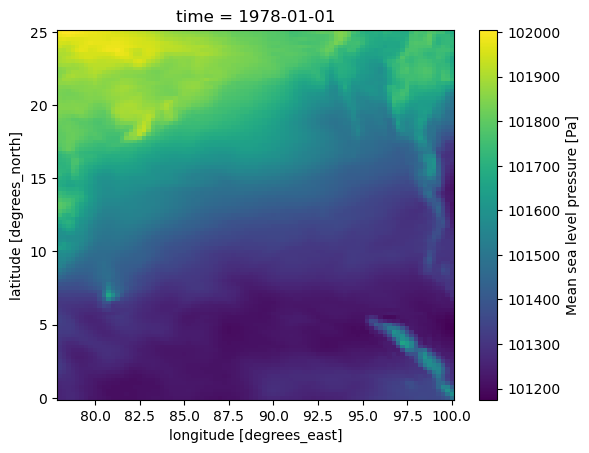

In [7]:
slp_data.msl[0,:,:].plot()


In [8]:
# selecting variable for lat lon and time
lon = slp_data['longitude'][:]
lat = slp_data['latitude'][:]
time = slp_data['time'][:]

#converting lon lat in lon2d and lat2d
lon2d, lat2d = np.meshgrid(lon, lat)

In [9]:
 
slp_time = []
for k in tqdm(range(len(slp_data.time)),desc="SLP Loop"):
    slp_time.append(str(slp_data.time[k])[36:49])

SLP Loop:   0%|          | 0/385704 [00:00<?, ?it/s]

# SLP of Cyclone at beginning

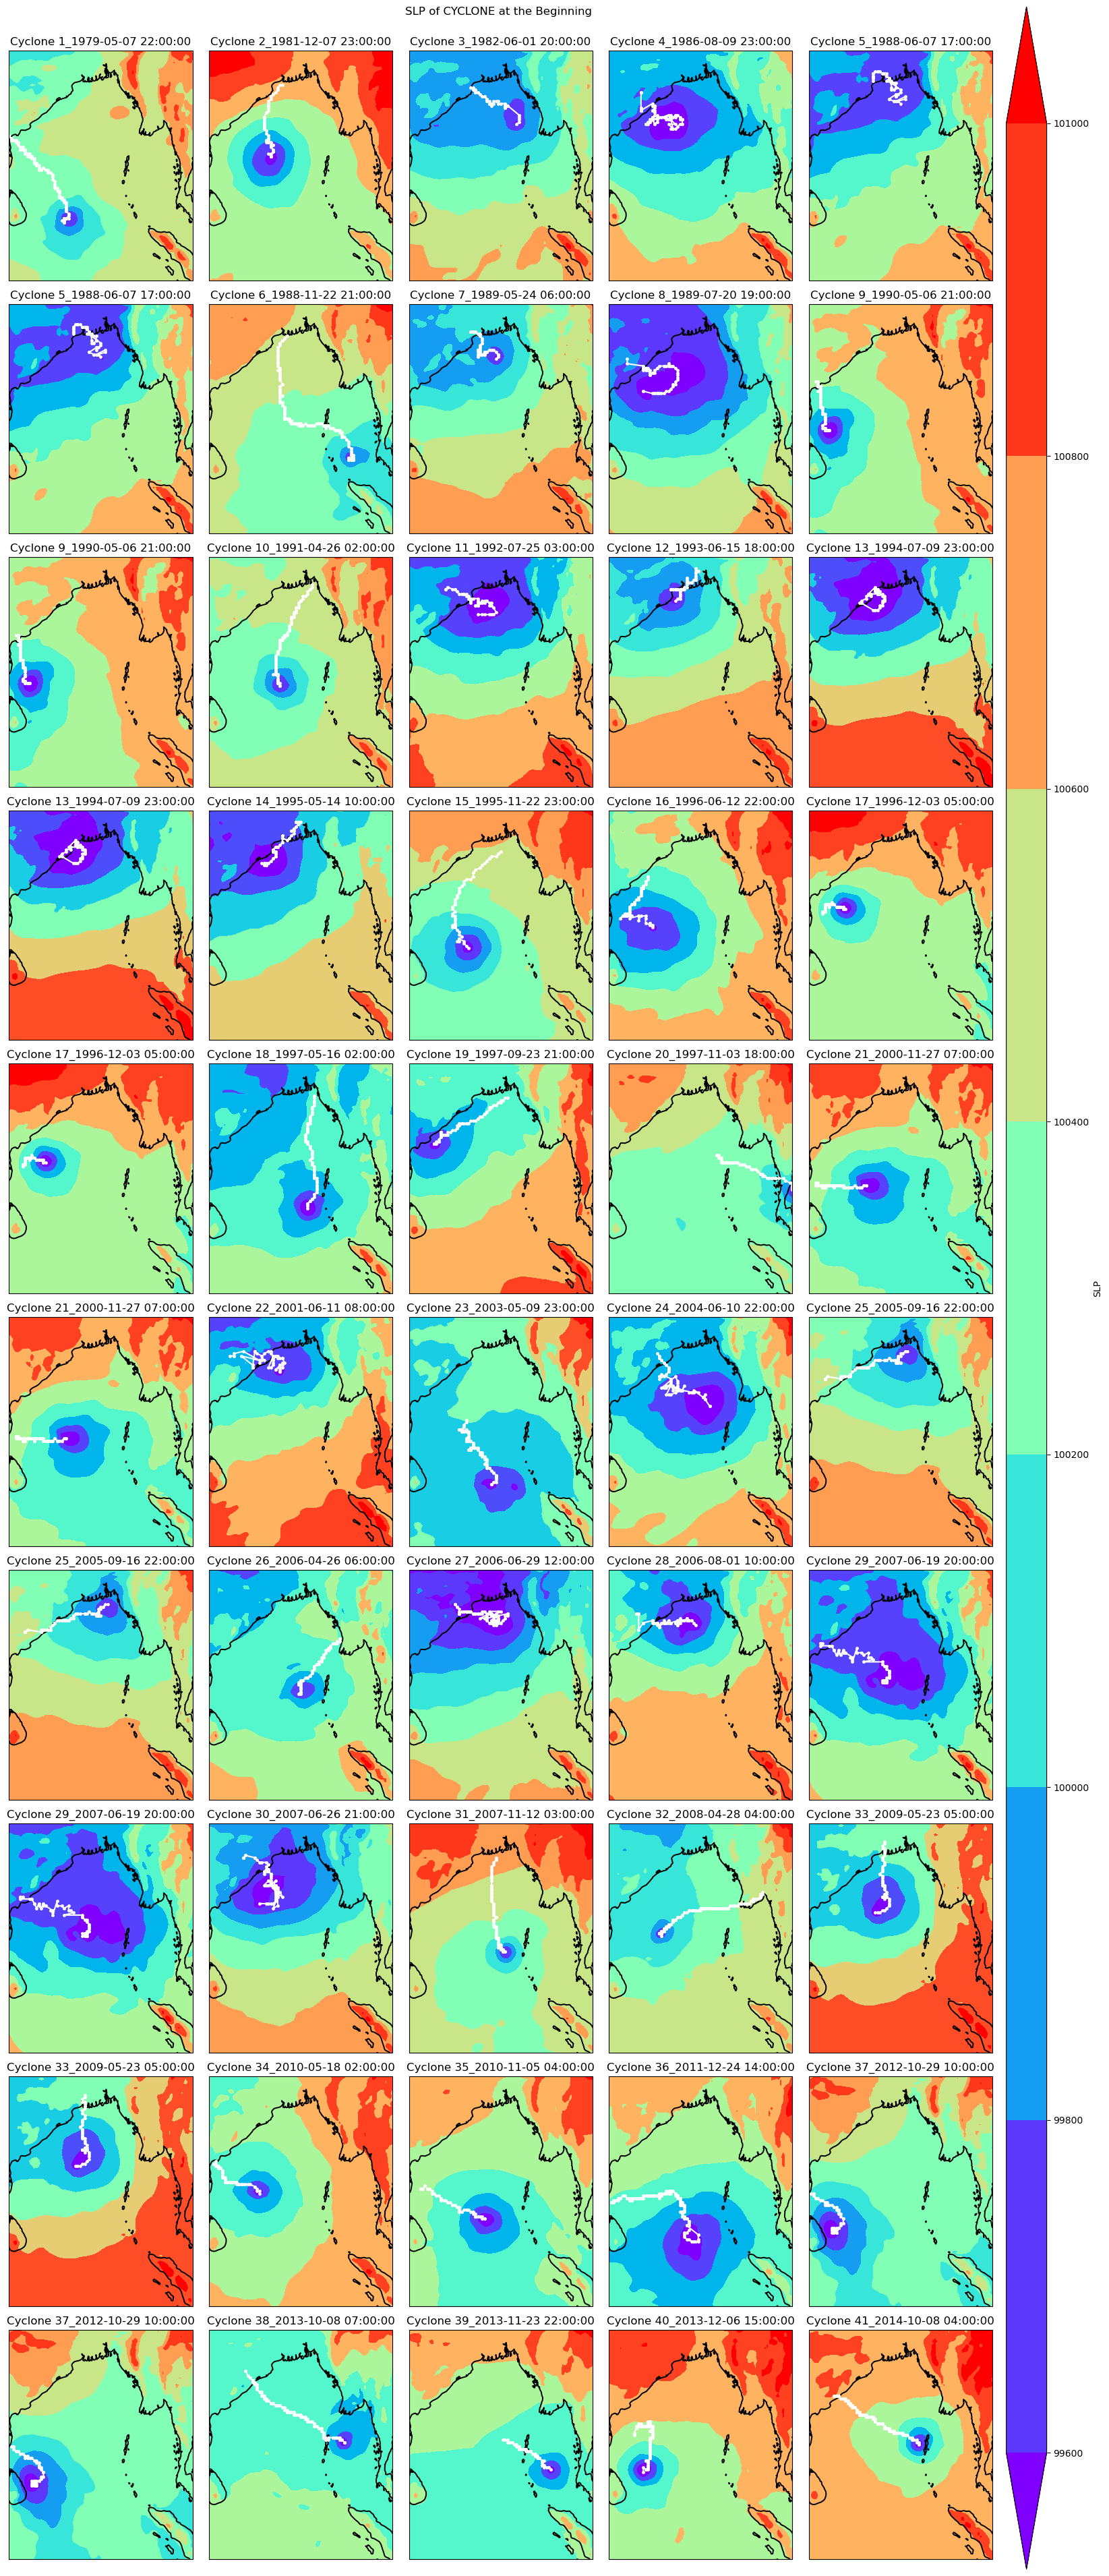

In [10]:




# slp_time = []
# for k in range(len(slp_data.time)):
#     slp_time.append(str(slp_data.time[k])[36:49])

fig, axs = plt.subplots(10, 5, figsize=(15, 38), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []

for i in range(10):
    for j in range(5):
        # Taking the cyclone number from input
        cyclone_number = i*4 + j + 1

        sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
        cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()

        # Date problem solved by conversion
        target_date = cyclone_data.ISO_TIME[0] 
        target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")

        index = slp_time.index(target_cyclone_date)


        # plotting
        axs[i,j].plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=2.5, color='white', transform=ccrs.PlateCarree())
        axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
        axs[i,j].coastlines(linewidth=1.4)
        axs[i,j].set_title(f"Cyclone {cyclone_number}_{target_date}")
        # ax.gridlines(draw_labels=True)

        # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        # Create the contourf plot
        contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        contourf_objects.append(contourf)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0, 0.04,1])  # Define the position of the colorbar [left, bottom, width, height]

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("SLP of CYCLONE at the Beginning ", y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()

# SLP of Cyclone at Half-time


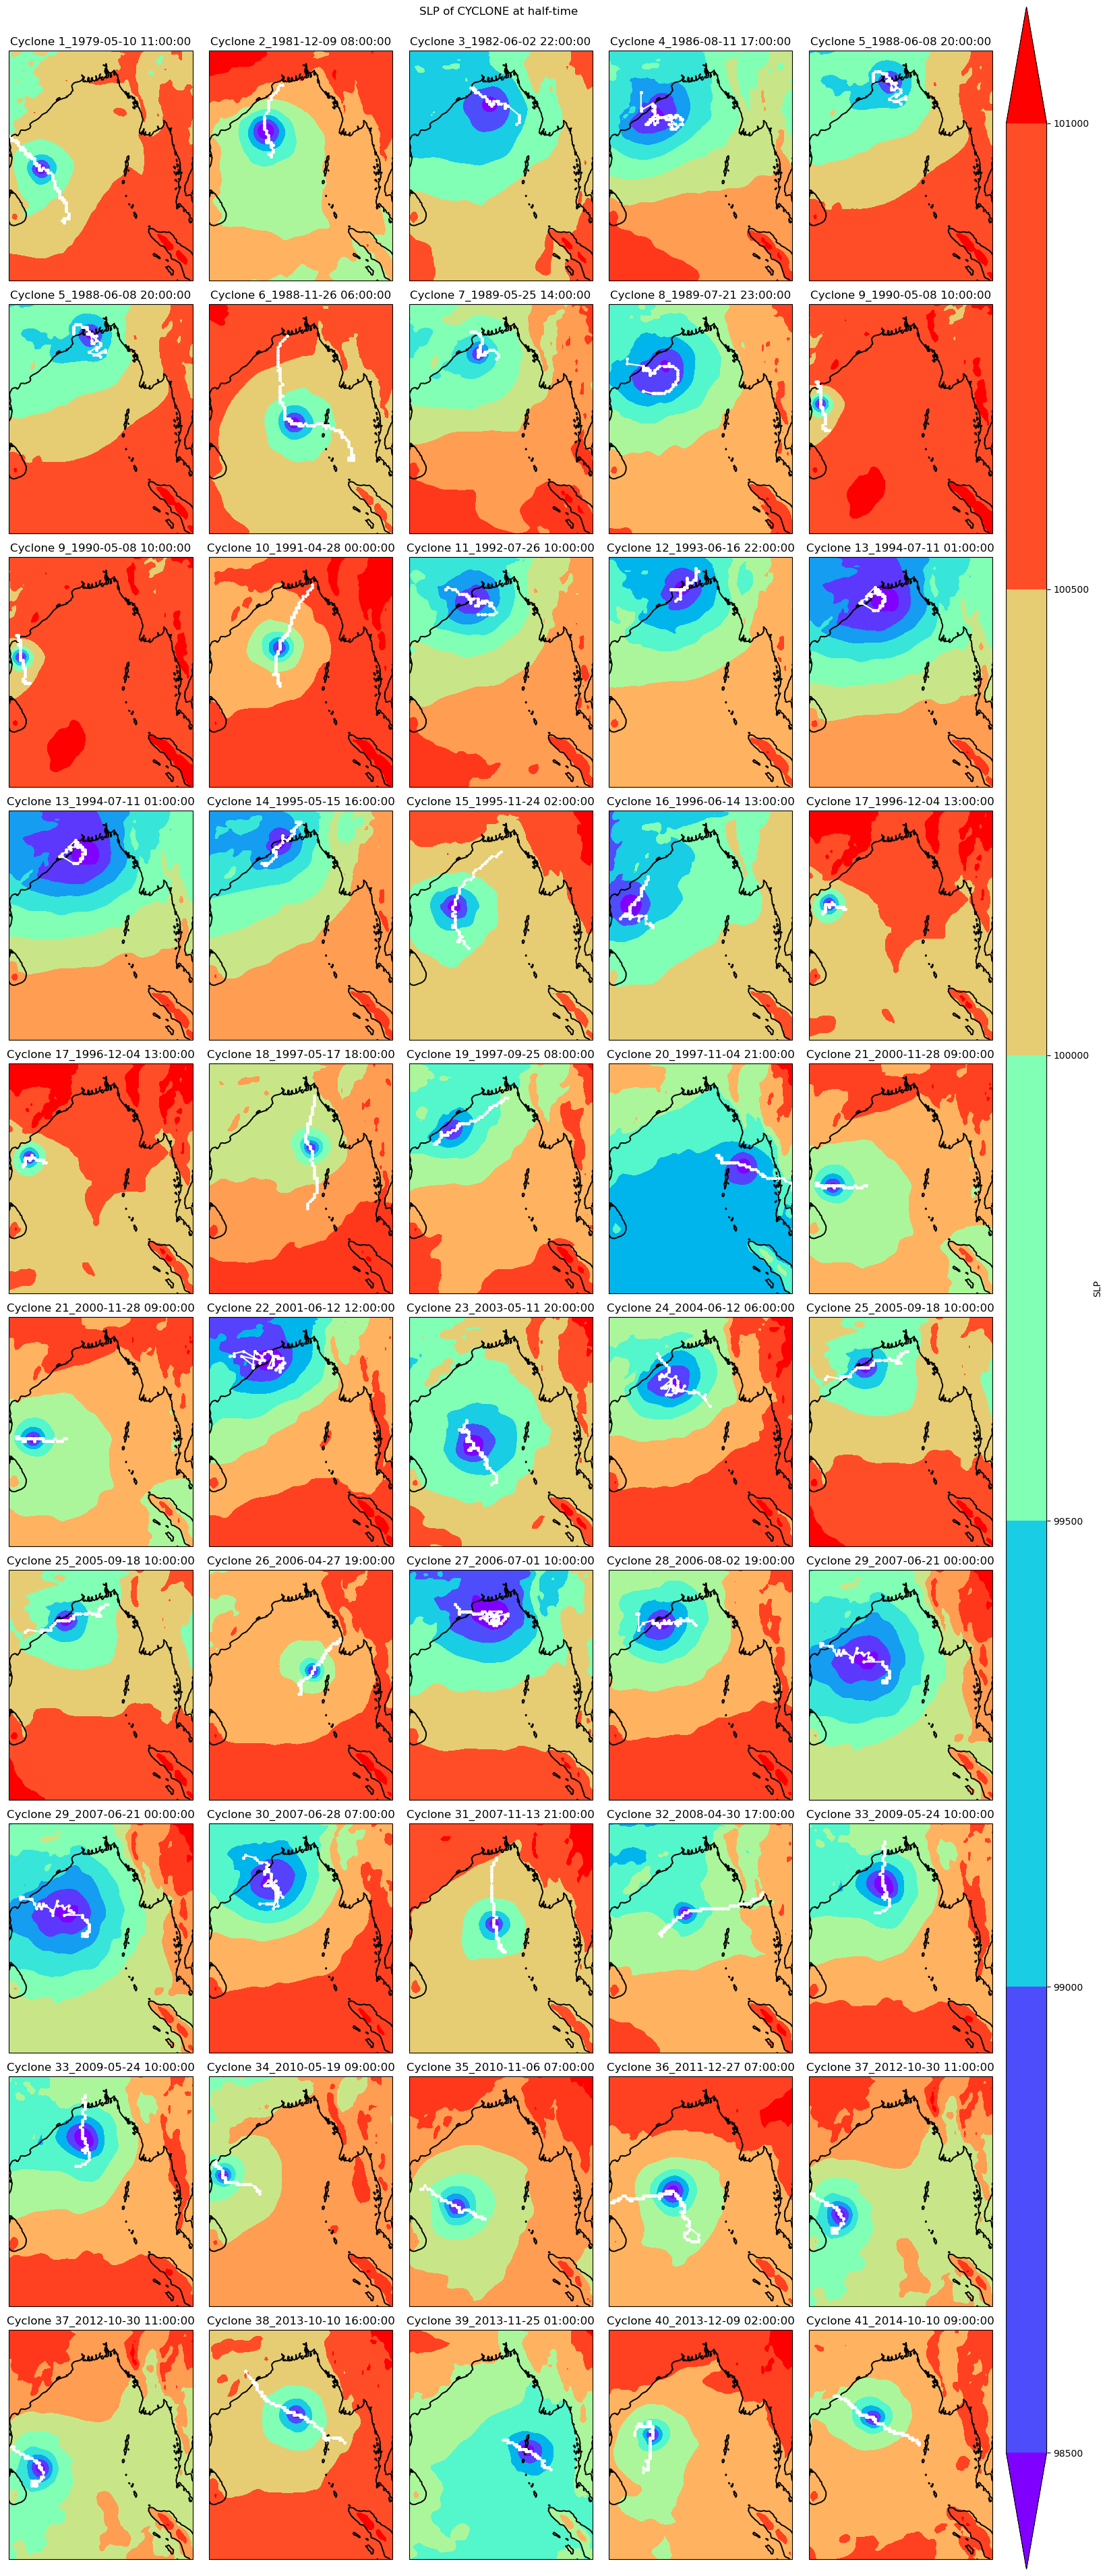

In [11]:




# slp_time = []
# for k in range(len(slp_data.time)):
#     slp_time.append(str(slp_data.time[k])[36:49])

fig, axs = plt.subplots(10, 5, figsize=(15, 38), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []

for i in range(10):
    for j in range(5):
        # Taking the cyclone number from input
        cyclone_number = i*4 + j + 1

        sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
        cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()
        num=math.ceil(cyclone_data.shape[0]/2)

        # cyclone_data = cyclone[cyclone['NUMBER'] == float(cyclone_number)]

        # Date problem solved by conversion
        target_date = cyclone_data.ISO_TIME[num] #0, #-1, #halftime
        target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")

        index = slp_time.index(target_cyclone_date)


        # plotting
        axs[i,j].plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=2.5, color='white', transform=ccrs.PlateCarree())
        axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
        axs[i,j].coastlines(linewidth=1.4)
        axs[i,j].set_title(f"Cyclone {cyclone_number}_{target_date}")
        # ax.gridlines(draw_labels=True)

        # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        # Create the contourf plot
        contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        contourf_objects.append(contourf)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0, 0.04,1])  # Define the position of the colorbar [left, bottom, width, height]

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("SLP of CYCLONE at half-time ", y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()

# SLP of Cyclone on Land

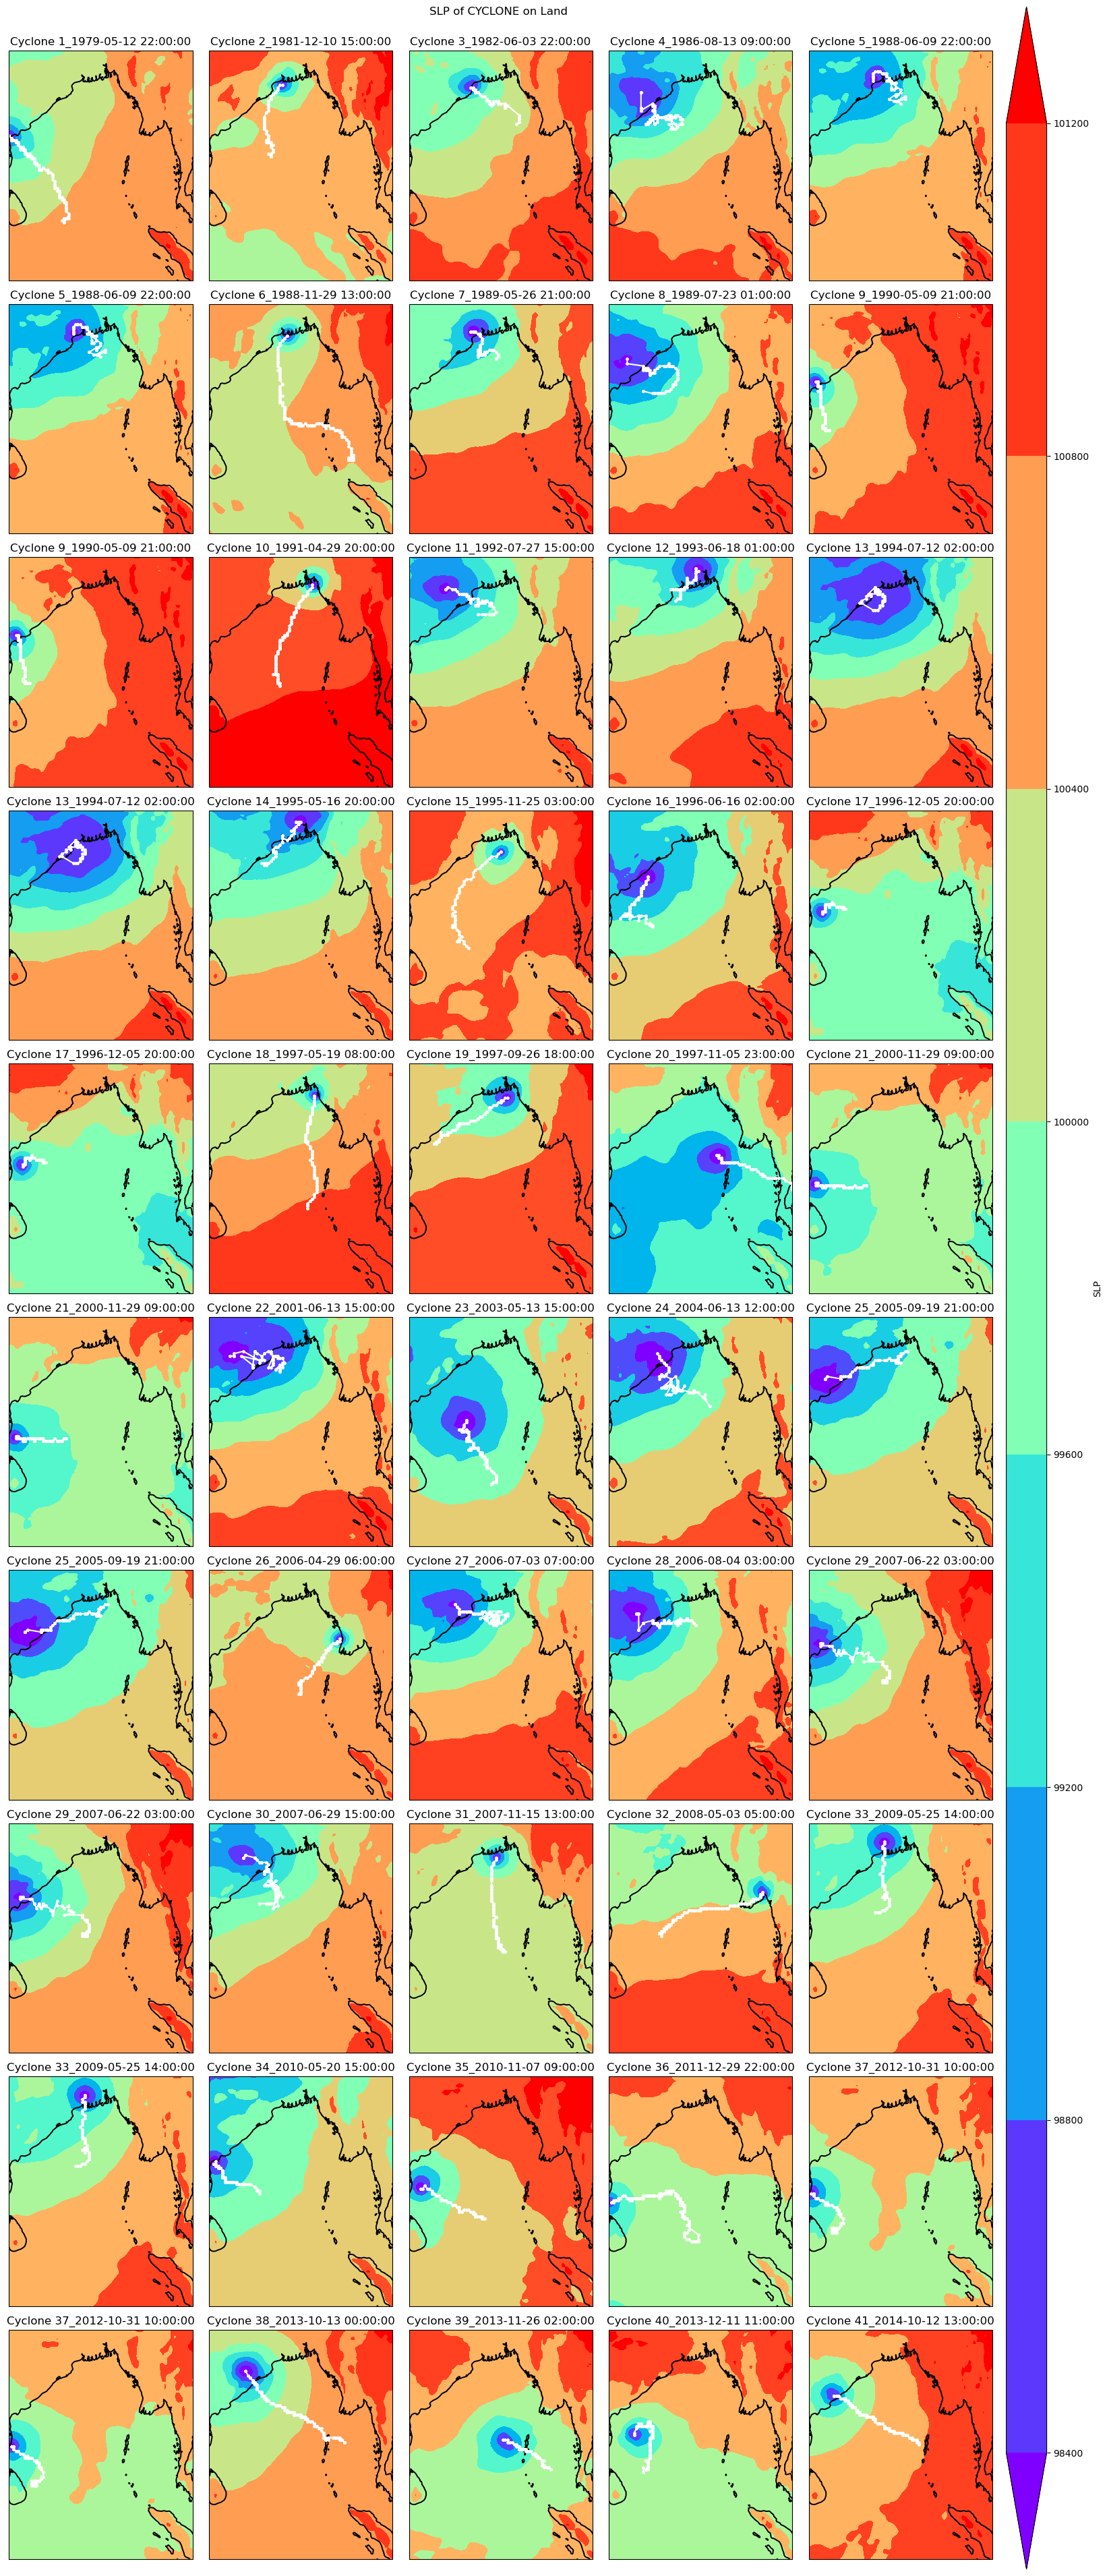

In [12]:




# slp_time = []
# for k in range(len(slp_data.time)):
#     slp_time.append(str(slp_data.time[k])[36:49])

fig, axs = plt.subplots(10, 5, figsize=(15, 38), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []

for i in range(10):
    for j in range(5):
        # Taking the cyclone number from input
        cyclone_number = i*4 + j + 1

        sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
        cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()
        num=cyclone_data.shape[0]-1

        # cyclone_data = cyclone[cyclone['NUMBER'] == float(cyclone_number)]

        # Date problem solved by conversion
        target_date = cyclone_data.ISO_TIME[num] #0, #-1, #halftime
        target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")

        index = slp_time.index(target_cyclone_date)


        # plotting
        axs[i,j].plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=2.5, color='white', transform=ccrs.PlateCarree())
        axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
        axs[i,j].coastlines(linewidth=1.4)
        axs[i,j].set_title(f"Cyclone {cyclone_number}_{target_date}")
        # ax.gridlines(draw_labels=True)

        # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        # Create the contourf plot
        contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        contourf_objects.append(contourf)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0, 0.04,1])  # Define the position of the colorbar [left, bottom, width, height]

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("SLP of CYCLONE on Land ", y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()